In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
def return_dataset():
    dataset = pd.read_excel('Muscular_Data.xlsx')
    y = dataset['Carrier']
    X = dataset.drop('Carrier', axis = 1)
    X = X - X.mean() / X.std()
    X['Pyrovate_Kinase'] = X['Pyrovate_Kinase'].fillna(X['Pyrovate_Kinase'].median())
    y = y.to_numpy().reshape((X.shape[0], 1))
    X = X.to_numpy()
    return X, y

In [9]:
class LogisticRegression:
   
    def __init__(self, lr= 0.001, iterations= 1000):
        self.lr = lr
        self.iterations = iterations
        self.theta = None
        self.bias = None
   
   # X is a numpy array with m samples and n features (m X n)
   # Y is a row vector of size 1 x n
    def fit(self, X, y):
        # initialising the parameters and weights
        n_samples, n_features = X.shape
        self.theta = np.random.random_sample((n_features, 1))
        self.bias = np.random.random_sample()

        # gradient descent
        for _ in range(self.iterations):
            linear_model = X @ self.theta + self.bias
            y_predicted = self._sigmoid(linear_model)

            dt = (1/n_samples) * (X.T @ (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            self.theta -= self.lr * dt
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = X @ self.theta + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        y_predicted_cls = np.array(y_predicted_cls).reshape((X.shape[0], 1))
        return y_predicted_cls

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def accuracy(self, y_true, y_pred):
        accuracy = (np.sum(y_true == y_pred)) / len(y_true)
        return accuracy


In [8]:
X, y = return_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)

In [18]:
regressor = LogisticRegression(lr= 0.001, iterations= 1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
score = regressor.accuracy(y_test, predictions)
print(score)

0.7619047619047619


In [19]:
import seaborn as sns
from sklearn import metrics
from matplotlib import pyplot as plt

In [20]:
cm = metrics.confusion_matrix(y_test, predictions)

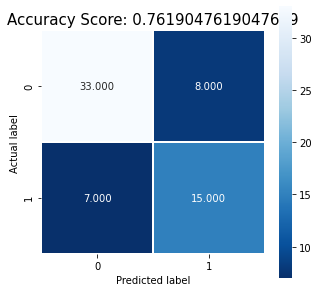

In [22]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('Logistic confusion matrix')